In [1]:
%reload_ext autoreload
%autoreload 2

import os, sys
sys.path.append('..')

import numpy as np
from astropy.io import fits
import pickle

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

In [2]:
def plot_val(x):
    return np.flipud(np.log(np.clip(np.abs(x), 1e-100, None)))

## compare idl output

In [114]:
name = 'hep_tf'
tf = np.load(f'../data/tfdata/array/nBs_test_2/{name}.npy')
tf_slice_old = np.clip(tf[i_nBs, i_x, i_rs], 1e-100, None)
tf_new = np.load(f'../data/tfdata/test/{name}.npy')
tf_slice_new = np.clip(tf_new[0,0,0], 1e-100, None)
np.max(np.abs(tf_slice_new-tf_slice_old)/tf_slice_old)

3.476364899916862e-16

In [115]:
name = 'lep_tf'
tf = np.load(f'../data/tfdata/array/nBs_test_2/{name}.npy')
tf_slice_old = np.clip(tf[i_nBs, i_x, i_rs], 1e-100, None)
for i in range(500):
    if tf_slice_old[i][i] > 1e-40:
        break
    tf_slice_old[i][i] = 1
    
tf_new = np.load(f'../data/tfdata/test/{name}.npy')
tf_slice_new = np.clip(tf_new[0,0,0], 1e-100, None)
for i in range(500):
    if tf_slice_new[i][i] > 1e-40:
        break
    tf_slice_new[i][i] = 1
np.max(np.abs(tf_slice_new-tf_slice_old)/tf_slice_old)

4.440892098500626e-16

In [134]:
name = 'lee_tf'
tf = np.load(f'../data/tfdata/array/nBs_test_2/{name}.npy')
tf_slice_old = np.clip(tf[i_nBs, i_x, i_rs], 1e-100, None)
tf_new = np.load(f'../data/tfdata/test/{name}.npy')
tf_slice_new = np.clip(tf_new[0,0,0], 1e-100, None)
np.max(np.abs(tf_slice_new-tf_slice_old)/tf_slice_old)

2.756036242423921e-16

In [133]:
name = 'lee_tf'
tf = np.load(f'../data/tfdata/array/nBs_test_2/{name}.npy')
tf_slice_old = np.clip(tf[i_nBs, i_x, i_rs], 1e-100, None)
tf_new = np.load(f'../data/tfdata/test/{name}.npy')
tf_slice_new = np.clip(tf_new[0,0,0], 1e-100, None)
np.max(np.abs(tf_slice_new-tf_slice_old)/tf_slice_old)

2.756036242423921e-16

In [111]:
name = 'hed_tf'
tf = np.load(f'../data/tfdata/array/nBs_test_2/{name}.npy')
tf_slice_old = np.clip(tf[i_nBs, i_x, i_rs], 1e-100, None)
tf_new = np.load(f'../data/tfdata/test/{name}.npy')
tf_slice_new = np.clip(tf_new[0,0,0], 1e-100, None)
np.max(np.abs(tf_slice_new-tf_slice_old)/tf_slice_old)

0.0

In [112]:
name = 'cmbloss'
tf = np.load(f'../data/tfdata/array/nBs_test_2/{name}.npy')
tf_slice_old = np.clip(tf[i_nBs, i_x, i_rs], 1e-100, None)
tf_new = np.load(f'../data/tfdata/test/{name}.npy')
tf_slice_new = np.clip(tf_new[0,0,0], 1e-100, None)
np.max(np.abs(tf_slice_new-tf_slice_old)/tf_slice_old)

0.0

In [113]:
name = 'lowerbound'
tf = np.load(f'../data/tfdata/array/nBs_test_2/{name}.npy')
tf_slice_old = np.clip(tf[i_nBs, i_x, i_rs], 1e-100, None)
tf_new = np.load(f'../data/tfdata/test/{name}.npy')
tf_slice_new = np.clip(tf_new[0,0,0], 1e-100, None)
np.max(np.abs(tf_slice_new-tf_slice_old)/tf_slice_old)

0.0

## compare make_phot_tf output

## old

In [3]:
abscs, phot_tfgv = pickle.load(open('../transferfunctions/nBs_test_2/phot_tf_dlnz4.879E-2_renxo_ad.p', 'rb'))

In [121]:
_, phot_depgv = pickle.load(open('../transferfunctions/nBs_test_2/phot_dep_dlnz4.879E-2_renxo_ad.p', 'rb'))

In [4]:
i_rs = 7
i_x = 3
i_nBs = 5
print(abscs['rs'][i_rs])
print(abscs['x'][i_x])
print(abscs['nBs'][i_nBs])

15.076371999678692
0.33333666666666667
8.333333333333334


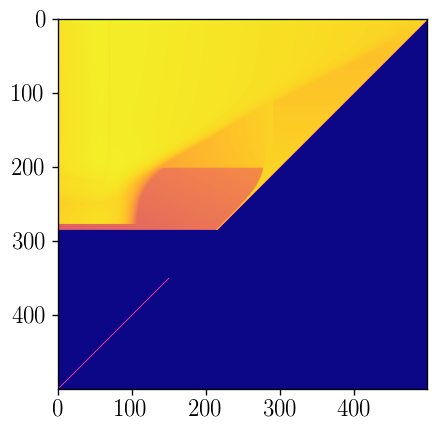

In [5]:
plt.imshow(plot_val(phot_tfgv[i_rs, :, i_x, i_nBs, :]), cmap='plasma');

## new

In [129]:
phot_tfgv_new = np.load('../data/tfdata/test/phot_tfgv.npy')

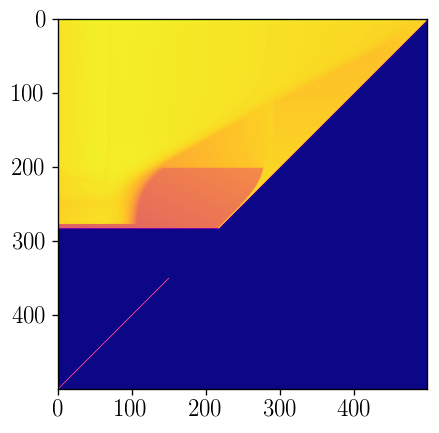

In [131]:
plt.imshow(plot_val(phot_tfgv_new[0,0,0]), cmap='plasma');

In [163]:
abscs_2 = pickle.load(open('../data/abscissas/abscs_nBs_test_2.p', 'rb'))
abscs   = pickle.load(open('../data/abscissas/abscs_test.p', 'rb'))

In [153]:
phot_depgv_new = np.load('../data/tfdata/test/phot_depgv.npy')
phot_depgv_new_new = np.load('../data/tfdata/test/phot_depgv_comp.npy')

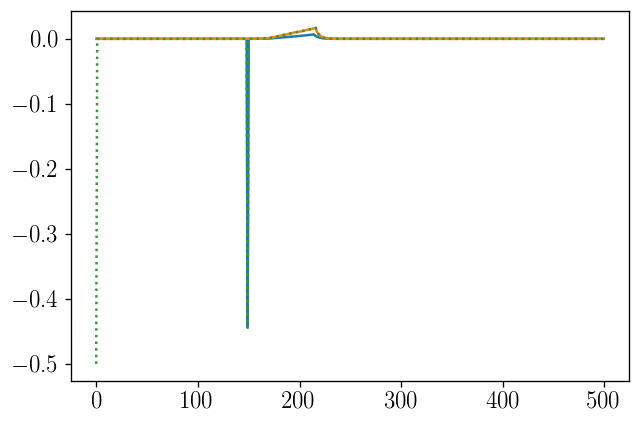

In [176]:
plt.plot(phot_depgv[i_rs, :, i_x, i_nBs, 4]/abscs['photE'])
plt.plot(phot_depgv_new[0,0,0,:,4])
plt.plot(phot_depgv_new_new[0,0,0,:,4], ':')
#plt.yscale('log')
#plt.ylim(1e-2, 1e5)